In this notebook, we will cover:

* [Grouped Summaries](#Grouped-Summaries)
* [Pipes](#Pipes)

Let us load up the `tidyverse` and `nycflights13` packages.

In [1]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Grouped Summaries

`summarize()` can be used to summarize entire data frames by collapsing them into single number summaries.

In [2]:
summarize(flights, delay = mean(dep_delay))

delay
<dbl>
NA


Oops, we got `NA` since most operations involving missing values yield missing values. We can ignore missing values like this.

In [3]:
summarize(flights, delay = mean(dep_delay, na.rm = TRUE))

delay
<dbl>
12.63907


The usefulness of `summarize()` is greater when used in conjunction with `group_by()`.

In [4]:
by_month <- group_by(flights, year, month)
(monthly_delays <- summarize(by_month, delay = mean(dep_delay, na.rm = TRUE)))

year,month,delay
<int>,<int>,<dbl>
2013,1,10.036665
2013,2,10.816843
2013,3,13.227076
2013,4,13.938038
2013,5,12.986859
2013,6,20.846332
2013,7,21.727787
2013,8,12.611040
2013,9,6.722476


Many summarization functions are available:

* Center: `mean(), median()`
* Spread: `sd(), IQR(), mad()`
* Range: `min(), max(), quantile()`
* Position: `first(), last(), nth()`
* Count: `n(), n_distinct()`
* Logical: `any(), all()`

# Pipes

The above code can be written without the use of the intermediate variable `by_month` using pipes.

In [5]:
(monthly_delays <- group_by(flights, year, month) %>%
    summarize(delay = mean(dep_delay, na.rm = TRUE)))

year,month,delay
<int>,<int>,<dbl>
2013,1,10.036665
2013,2,10.816843
2013,3,13.227076
2013,4,13.938038
2013,5,12.986859
2013,6,20.846332
2013,7,21.727787
2013,8,12.611040
2013,9,6.722476


Pipes make it easy for the author and reader of the code to focus on which transformations are occuring.

In [6]:
# Without pipes
by_dest <- group_by(flights, dest)
dest_summary <- summarize(by_dest, count = n(), delay = mean(dep_delay, na.rm = TRUE))
(dest_summary_final <- arrange(dest_summary, desc(count)))

dest,count,delay
<chr>,<int>,<dbl>
ORD,17283,13.570484
ATL,17215,12.509824
LAX,16174,9.401344
BOS,15508,8.730613
MCO,14082,11.275998
CLT,14064,9.222879
SFO,13331,12.866289
FLL,12055,12.731104
MIA,11728,8.876558


In [7]:
# With pipes
(dest_summary_final <- group_by(flights, dest) %>%
    summarize(count = n(), delay = mean(dep_delay, na.rm = TRUE)) %>%
    arrange(desc(count)))

dest,count,delay
<chr>,<int>,<dbl>
ORD,17283,13.570484
ATL,17215,12.509824
LAX,16174,9.401344
BOS,15508,8.730613
MCO,14082,11.275998
CLT,14064,9.222879
SFO,13331,12.866289
FLL,12055,12.731104
MIA,11728,8.876558


Under the hood, `x %>% f(y)` turns into `f(x, y)`, and `x %>% f(y) %>% g(z)` turns into `g(f(x, y), z)` and so on.

You can even plot the data by adding a `ggplot` command at the end.

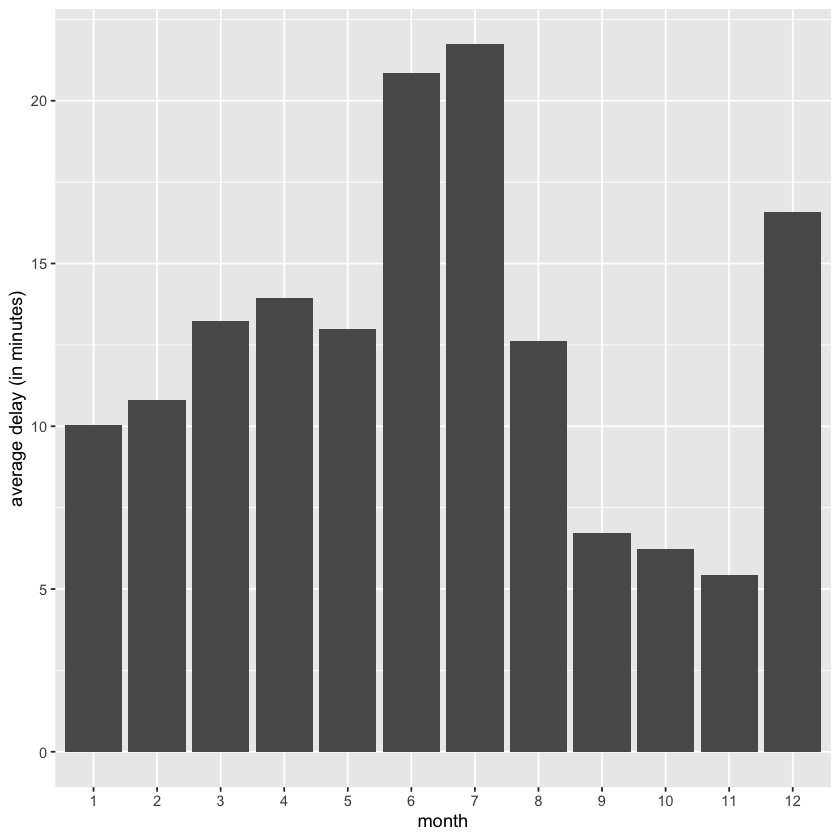

In [8]:
#options(repr.plot.width=6, repr.plot.height=4) # to ensure we do not get very large plots

group_by(flights, year, month) %>%
    summarize(delay = mean(dep_delay, na.rm = TRUE)) %>%
    ggplot() +
        geom_bar(mapping = aes(x=factor(month), y=delay), stat = "identity") +
        labs(x = "month", y = "average delay (in minutes)")